[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alessandronascimento/LabData/DSF_scripts/blob/main/DSF_derivative.ipynb)
# Derivative of DSF data

This python script takes the raw DSF data and computes its first derivative (dF/dT). By finding the maximal point in the derivative curve (d2F/dT2 = 0), it also gets the Tm for that curve.

Finally, the dF/dT curves are printed using pyplot.

## Instructions to use the script

Go in Execution Environment and click in "Run all". 

The script will ask you to upload your datafile. The data file should be a text file with columns separated by tab or spaces. The first line is supposed to contain the headers (Temperature, A1, A2, A3, ...) and the first column is supposed to contain the temperatures (25, 26, 27, ...). The remaining matrix should contain the raw fluorescence data.

Saving test.dat to test (21).dat
User uploaded file "test.dat" with length 20602 bytes
there are 71 temperature points
Tm for ligand A1: 53.000000
Tm for ligand A2: 94.000000
Tm for ligand A3: 46.000000
Tm for ligand A4: 51.000000
Tm for ligand A5: 54.000000
Tm for ligand A6: 52.000000
Tm for ligand A7: 52.000000
Tm for ligand A8: 55.000000
Tm for ligand A9: 53.000000
Tm for ligand A10: 33.000000
Tm for ligand A11: 44.000000
Tm for ligand A12: 59.000000
Tm for ligand B1: 53.000000
Tm for ligand B2: 52.000000
Tm for ligand B3: 49.000000
Tm for ligand B4: 57.000000
Tm for ligand B5: 34.000000
Tm for ligand B6: 56.000000
Tm for ligand B7: 57.000000
Tm for ligand B8: 59.000000
Tm for ligand B9: 53.000000
Tm for ligand B10: 61.000000
Tm for ligand B11: 55.000000
Tm for ligand B12: 52.000000


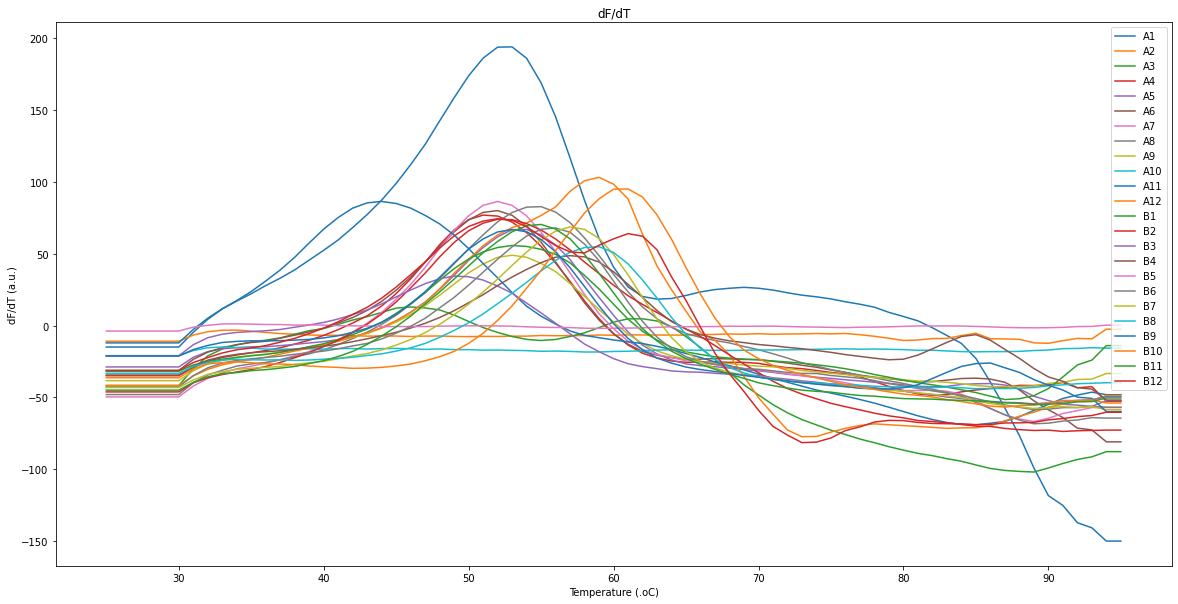

In [24]:
#@title Running code
from matplotlib import pyplot as plt
from google.colab import files

datafile=''
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  datafile=fn;


count_line=0;
headers = []
temperature = []
dataset = []

n_lig = 0

file = open(datafile, 'r')
for line in file:
  count_line=count_line + 1
  line1 = line.split()
  if count_line == 1:
    for i in range(0,len(line1)):
      headers.append(str(line1[i]));
  else:
    temperature.append(float(line1[0]));
    v = [];
    for j in range(1,len(line1)):
      v.append(float(line1[j]));
    dataset.append(v)

print("There are %d temperature points" % len(temperature));

dF_dT=[]

for i in range(0,len(temperature)-1):
  v = []
  for j in range(0,len(dataset[0])):
    dF = dataset[i+1][j]-dataset[i][j] / (temperature[i+1]-temperature[i])
    v.append(dF)
  dF_dT.append(v)

#print("dF_dT length: %d" % len(dF_dT))
#print("dF_dT[0] length: %d" % len(dF_dT[0]))
#print(dF_dT[0])

fig, axes = plt.subplots(figsize=(20,10))

for j in range(0,len(dF_dT[0])):
  v = []
  max = -9999999.
  tmax = 0
  for i in range(0,len(dF_dT)):
    v.append(dF_dT[i][j])
    if (dF_dT[i][j] > max):
      max = dF_dT[i][j]
      tmax = temperature[i]
  v.append(v[len(v)-1])
  print("Tm for ligand %s: %f" % (headers[j+1], tmax))
  plt.plot(temperature, v, label=headers[j+1])

plt.plot()
plt.title("dF/dT") 
plt.xlabel("Temperature (.oC)") 
plt.ylabel("dF/dT (a.u.)")
plt.legend()
plt.show() 